# Classification task 2
## Data:
### Response:
__religion:__ 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others
### Predictors:
1. __name:__ Name of the country concerned
2. __landmass:__ 1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania
3. __zone:__ Geographic quadrant, based on Greenwich and the Equator 1=NE, 2=SE, 3=SW, 4=NW
4. __area:__ in thousands of square km
5. __population:__	in round millions
6. __language:__ 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others
7. __bars:__ Number of vertical bars in the flag
8. __stripes:__ Number of horizontal stripes in the flag
9. __colours:__ Number of different colours in the flag
10. __red:__ 0 if red absent, 1 if red present in the flag
11. __green:__ same for green
12. __blue:__ same for blue
13. __gold:__ same for gold (also yellow)
14. __white:__ same for white
15. __black:__ same for black
16. __orange:__ same for orange (also brown)
17. __mainhue:__ predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue)
18. __circles:__ Number of circles in the flag
19. __crosses:__ Number of (upright) crosses
20. __saltires:__ Number of diagonal crosses
21. __quarters:__ Number of quartered sections
22. __sunstars:__ Number of sun or star symbols
23. __crescent:__ 1 if a crescent moon symbol present, else 0
24. __triangle:__ 1 if any triangles present, 0 otherwise
25. __icon:__ 1 if an inanimate image present (e.g., a boat), otherwise 0
26. __animate:__ 1 if an animate image (e.g., an eagle, a tree, a human hand) present, 0 otherwise
27. __text:__ 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise
28. __topleft:__ colour in the top-left corner (moving right to decide tie-breaks)
29. __botright:__ Colour in the bottom-left corner (moving left to decide tie-breaks)

Побудуйте класифікатор використовуючи:


1. Вирішуюче дерево

2. Бустінг 

3. Випадковий ліс


Оберіть два найбільш значущих регресори (будь-яким методом) та намалюйте області класифікації в R^2.


Для кожного методу проведіть підбір параметрів для потреби (для цього можна скористатися модулем sklearn.model_selection.GridSearchCV).


Строк для цієї роботи: 20 травня

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# define columns
colnames=['name', 'landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 'stripes', 'colours',
          'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses', 'saltires',
          'quarters', 'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft', 'botright']
# read data
df = pd.read_csv('data/flag.data', names=colnames, header=None)
# convert factor columns (mainhue, topleft, botright)
convert_factor = {'black': 0, 'blue': 1, 'brown': 2, 'gold': 3, 'green': 4, 'orange': 5, 'red': 6, 'white': 7}
for factor in ['mainhue', 'topleft', 'botright']:
    df[factor] = df[factor].apply(lambda x: convert_factor[x])

df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,0,4
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,6,6
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,4,7
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,1,6
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,1,6


In [3]:
from sklearn.model_selection import train_test_split

# split data
X, y = df.drop(['religion', 'name'], axis=1), df['religion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Decision Trees

In [4]:
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

'''
decision_tree = tree.DecisionTreeClassifier()

depths = np.arange(1, 21)
num_leafs = [1, 5, 10, 20, 50, 100]
param_grid = [{'max_depth': depths,
              'min_samples_leaf': num_leafs}]

decision_tree = GridSearchCV(decision_tree, param_grid)
decision_tree = decision_tree.fit(X_train, y_train)
decision_tree.best_params_
# output: {'max_depth': 4, 'min_samples_leaf': 5}
'''

decision_tree = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)
decision_tree = decision_tree.fit(X_train, y_train)

# predict
decision_tree_pred = decision_tree.predict(X_test)

# classification_report
target_names = ['Catholic', 'Other Christian', 'Muslim', 'Buddhist', 'Hindu', 'Ethnic', 'Marxist', 'Others']
print(classification_report(y_test, decision_tree_pred, target_names=target_names))

                 precision    recall  f1-score   support

       Catholic       0.33      0.50      0.40         6
Other Christian       0.89      0.80      0.84        20
         Muslim       0.38      1.00      0.55         9
       Buddhist       0.00      0.00      0.00         2
          Hindu       1.00      0.53      0.70        15
         Ethnic       0.00      0.00      0.00         5
        Marxist       0.00      0.00      0.00         2

    avg / total       0.65      0.61      0.59        59



# Random forest

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# perform grid search to get best fit parameters
'''
parameters = {'n_estimators': [10, 100, 200, 500, 1000, 1200],
              'max_depth': [None, 2, 5, 7, 10, 11, 13],
              'bootstrap': [True, False]}

rf_model = GridSearchCV(RandomForestClassifier(random_state=0), parameters, cv=5)
rf_model.fit(X_train, y_train)
rf_model.best_params_
# output: {'n_estimators': 10, 'max_depth': None, 'random_state': 0}
'''

rf_model = RandomForestClassifier(n_estimators=10, max_depth=None, random_state=0)
rf_model.fit(X_train, y_train)
# predict
rf_pred = rf_model.predict(X_test)

# classification_report
target_names = ['Catholic', 'Other Christian', 'Muslim', 'Buddhist', 'Hindu', 'Ethnic', 'Marxist', 'Others']
print(classification_report(y_test, rf_pred, target_names=target_names))

                 precision    recall  f1-score   support

       Catholic       0.50      0.67      0.57         6
Other Christian       0.75      0.90      0.82        20
         Muslim       0.50      1.00      0.67         9
       Buddhist       0.00      0.00      0.00         2
          Hindu       0.00      0.00      0.00         0
         Ethnic       1.00      0.40      0.57        15
        Marxist       0.50      0.20      0.29         5
         Others       0.00      0.00      0.00         2

    avg / total       0.68      0.64      0.61        59



# XGBoost

In [6]:
from xgboost import XGBClassifier

'''
xgb = XGBClassifier()
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
clf = GridSearchCV(xgb, params, n_jobs=5, cv=10)
clf.fit(X_train, y_train)
clf.best_params_
# output: {'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1.0}
'''

xgb = XGBClassifier(colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=1, subsample=1.0)
xgb.fit(X_train, y_train)
# make predictions for test data
y_pred = xgb.predict(X_test)

# classification_report
target_names = ['Catholic', 'Other Christian', 'Muslim', 'Buddhist', 'Hindu', 'Ethnic', 'Marxist', 'Others']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

       Catholic       0.33      0.50      0.40         6
Other Christian       0.73      0.80      0.76        20
         Muslim       0.36      0.89      0.52         9
       Buddhist       0.00      0.00      0.00         2
          Hindu       0.80      0.27      0.40        15
         Ethnic       0.00      0.00      0.00         5
        Marxist       0.00      0.00      0.00         2

    avg / total       0.54      0.53      0.48        59



# Combine algorithms

In [7]:
from sklearn.ensemble import VotingClassifier

estimators = [("decision tree", decision_tree), ("rf", rf_model), ("xgboost", xgb)]
ensemble = VotingClassifier(estimators, voting="hard")

ensemble.fit(X_train, y_train)
# make predictions for test data
y_pred = ensemble.predict(X_test)

# classification_report
target_names = ['Catholic', 'Other Christian', 'Muslim', 'Buddhist', 'Hindu', 'Ethnic', 'Marxist', 'Others']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

       Catholic       0.33      0.50      0.40         6
Other Christian       0.70      0.80      0.74        20
         Muslim       0.43      1.00      0.60         9
       Buddhist       0.00      0.00      0.00         2
          Hindu       1.00      0.40      0.57        15
         Ethnic       0.00      0.00      0.00         5
        Marxist       0.00      0.00      0.00         2

    avg / total       0.59      0.58      0.53        59



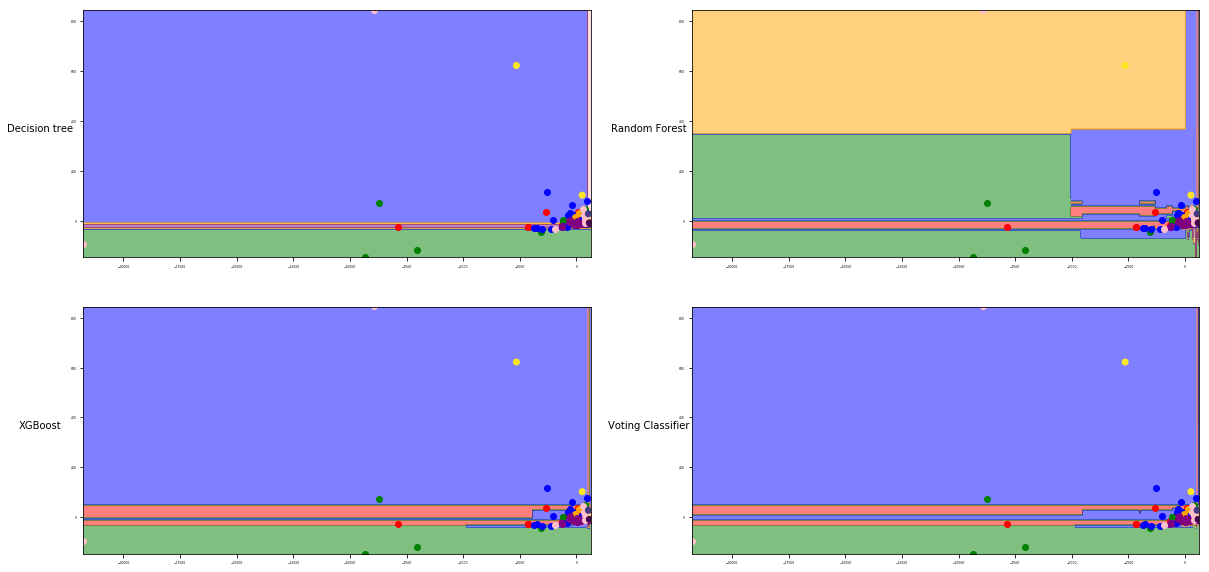

In [20]:
from sklearn.decomposition import KernelPCA
from matplotlib.colors import ListedColormap

def BoundaryLine(kernel, algo, algo_name):
    reduction = KernelPCA(n_components=2, kernel=kernel)
    x_train_reduced = reduction.fit_transform(X_train)
    x_test_reduced = reduction.transform(X_test)
    
    classifier = algo
    classifier.fit(x_train_reduced, y_train)
    
    y_pred = classifier.predict(x_test_reduced)
    

    #Boundary Line
    X_set, y_set = np.concatenate([x_train_reduced, x_test_reduced], axis = 0), np.concatenate([y_train, y_test], axis = 0)
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 10),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 10))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.5, cmap = ListedColormap(('red', 'green', 'blue', 'orange', 'grey', 'purple', 'pink')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green', 'blue', 'orange', 'grey', 'purple', 'pink'))(i), label = j)

    plt.xticks(fontsize = 3)
    plt.yticks(fontsize = 3)

fig = plt.figure(figsize=(20,10))
    
ax = plt.subplot(2,2,1)
ax.set_ylabel('Decision tree', rotation=0, labelpad=30, fontsize = 10)
BoundaryLine('linear', tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=5), "Decision tree")

ax = plt.subplot(2,2,2)
ax.set_ylabel('Random Forest', rotation=0, labelpad=30, fontsize = 10)
BoundaryLine('linear', RandomForestClassifier(n_estimators=10, max_depth=None, random_state=0), "Random Forest")

ax = plt.subplot(2,2,3)
ax.set_ylabel('XGBoost', rotation=0, labelpad=30, fontsize = 10)
BoundaryLine('linear', XGBClassifier(colsample_bytree=1.0, gamma=2, max_depth=3, min_child_weight=1, subsample=1.0), "XGBoost")

ax = plt.subplot(2,2,4)
ax.set_ylabel('Voting Classifier', rotation=0, labelpad=30, fontsize = 10)
estimators = [("decision tree", decision_tree), ("rf", rf_model), ("xgboost", xgb)]
BoundaryLine('linear', VotingClassifier(estimators, voting="hard"), "Voting Classifier")

fig.show()